## AMBench_MP

This notebook retrieves data from the 'MP_measurements.csv' file created in CDCS_MP.ipynb and queries the NIST Public Data Repository (PDR) for data related to AM-Bench. Plots are made showing the relationships between data from the ambench.nist.gov site and the PDR.

In [4]:
import pandas as py
import matplotlib.pyplot as plt
import json

### 1. Importing width and depth data measured in CDCS_MP.ipynb
- reads the data from MP_measurements.csv into a pandas dataframe
- sorts values based on case label

In [5]:
dfl=py.read_csv('MP_measurements.csv')
dfl=dfl.sort_values(by=['case'],ignore_index=True) 

In [6]:
dfl

,width,depth,track,case
0,156.612,50.034,6,A
1,145.948,44.888,7,A
2,143.406,46.252,5,A
3,116.002,40.672,8,B
4,122.946,38.130,10,B
5,98.766,36.146,9,B
6,102.238,35.092,4,C
7,99.200,34.100,3,C
8,101.246,31.620,1,C
9,100.936,31.992,2,C


### 2. Importing data from PDR
- uses the PDR API to return datasets relating to the searchphrase 'ambench' (returns two results)
- collects returned data in a pandas dataframe, and displays the titles, dois, and ediids of the results
- obtains the second dataset and reads one of the files (an excel file with summary data) into a dataframe and sorts based on case

In [7]:
qy=!(curl --silent GET "https://data.nist.gov/rmm/records?searchphrase='ambench'" -H "accept application/json")
qyjson=json.loads(qy[0])
dfr=py.DataFrame(qyjson['ResultData'])
dfr[['title','doi','ediid']]

,title,doi,ediid
0,In situ thermography of the metal bridge struc...,doi:10.18434/M31935,6F0C74FF99CC53D5E05324570681FA761935
1,In Situ Thermography of Single Scan Tracks Pe...,doi:10.18434/M31931,6D6EC9B3A4147BE2E05324570681EEC91931


In [9]:
urlget=qyjson['ResultData'][1]['components'][1]['downloadURL'] #obtaining the second result, looking in 'components' (files)
# for the second file's download url
dfu=py.read_excel(urlget, usecols="Q:AG",skiprows=14,header=None)
#labeling columns by hand
headers=['label','case','power (W)','speed (mm/s)','Line','# of frames with a melt pool','# of frames solidus is evident','Solidus (mean)','Soldius(+-1stdev)','Emissivity (mean)','Emissivity (+-1stdev)','MP Length (mean)','MP Length (+-1stdev)','cooling rate (mean, 1290-1190C)','cooling rate (+-1stdev, 1290-1190C)','cooling rate','cooling rate']
dfu.columns=headers

In [10]:
dfu=dfu.sort_values(by=['case'],ignore_index=True) #Line is the same as track in the CDCS - sorting by line to ensure it
#matches with the CDCS measurements

In [11]:
dfu

,label,case,power (W),speed (mm/s),Line,# of frames with a melt pool,# of frames solidus is evident,Solidus (mean),Soldius(+-1stdev),Emissivity (mean),Emissivity (+-1stdev),MP Length (mean),MP Length (+-1stdev),"cooling rate (mean, 1290-1190C)","cooling rate (+-1stdev, 1290-1190C)",cooling rate,cooling rate
0,Case A\nLine 3,A,150,400,3,54,53,966.221076,7.894847,0.224709,0.010962,0.653649,0.033884,6.207174e+05,71868.008559,5.586616e+05,44573.230264
1,Case A\nLine 6,A,150,400,6,51,27,974.617586,6.840134,0.236518,0.009783,0.659939,0.012471,6.581385e+05,94123.132697,5.835840e+05,59578.504366
2,Case A\nLine 9,A,150,400,9,51,49,971.758373,6.673886,0.232432,0.009403,0.664366,0.015155,5.810048e+05,43812.625263,5.352550e+05,25471.964294
3,Case B\nLine 2,B,195,800,2,26,25,951.721532,9.062642,0.205221,0.012074,0.778326,0.024662,9.000803e+05,164817.473114,9.334012e+05,92440.706479
4,Case B\nLine5,B,195,800,5,26,25,969.622360,9.188065,0.229519,0.012747,0.780684,0.023449,9.513812e+05,144409.181483,9.571681e+05,81631.053375
5,Case B\nLine 8,B,195,800,8,10,9,969.530859,6.144837,0.229257,0.008651,0.785878,0.013653,9.525507e+05,110954.494990,9.565544e+05,77406.048189
6,Case C\nLine 1,C,195,1200,1,17,11,921.376048,17.567759,0.168581,0.019578,0.756055,0.056129,1.309467e+06,470843.513383,1.379539e+06,321195.694013
7,Case C\nLine 4,C,195,1200,4,17,13,950.827516,11.627002,0.204180,0.015217,0.746817,0.036209,1.173340e+06,371325.243746,1.433278e+06,246385.906655
8,Case C\nLine 7,C,195,1200,7,17,15,962.543691,13.050242,0.219918,0.018090,0.758148,0.044418,1.401577e+06,371271.587730,1.540218e+06,323215.448826
9,Case C\nLine 10,C,195,1200,10,16,13,942.716193,18.568067,0.194330,0.024272,0.754246,0.045674,1.253445e+06,313206.883521,1.338532e+06,241686.792556


### 3. Plotting data

In [10]:
#Note - it looks like the PDR data is covering a different set of tracks from the CDCS. Still keeping this here for future
#reference.

In [22]:
dft=py.DataFrame([dfl['track'],dfl['width'],dfl['depth'],dfu['power (W)'],dfu['speed (mm/s)'],dfu['case']]) #making a dataframe of selected
#columns

In [23]:
dft=dft.transpose(copy=True) #index and columns are switched, so switching them back
dft=dft.sort_values(by='track',ignore_index=True) #sorting values by track
dft

,track,width,depth,power (W),speed (mm/s),case
0,1,101.246,31.62,195,1200,C
1,2,100.936,31.992,195,1200,C
2,3,99.2,34.1,195,1200,C
3,4,102.238,35.092,195,1200,C
4,5,143.406,46.252,150,400,A
5,6,156.612,50.034,150,400,A
6,7,145.948,44.888,150,400,A
7,8,116.002,40.672,195,800,B
8,9,98.766,36.146,195,800,B
9,10,122.946,38.13,195,800,B


Plotting widths ordered by track number, color-coded based on laser speed

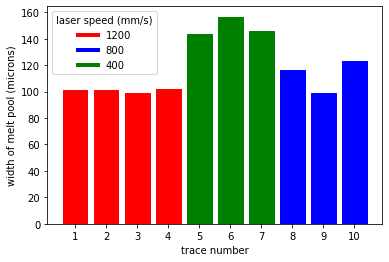

In [20]:
from matplotlib.lines import Line2D
dfti=dft
barlist=plt.bar(dfti['track'],dfti['width']) #creating a matplotlib bar plot
for i in dfti.index: #set the colors of the bars based on speed
    if dfti['speed (mm/s)'][i]==1200:
        barlist[i].set_color('r')
    elif dfti['speed (mm/s)'][i]==800:
        barlist[i].set_color('b')
    else:
        barlist[i].set_color('g')
#formatting the legend - creating three lines to correspond with labels
plt.legend(handles=[Line2D([0],[0],color='r',lw=4),
                Line2D([0],[0],color='b',lw=4),
                Line2D([0],[0],color='g',lw=4)],labels=['1200','800','400'],title='laser speed (mm/s)')
plt.xlabel('trace number')
plt.ylabel('width of melt pool (microns)')
plt.xticks(dfti['track'],dfti['track'])
plt.show()

plotting widths based on track number, colored by laser power

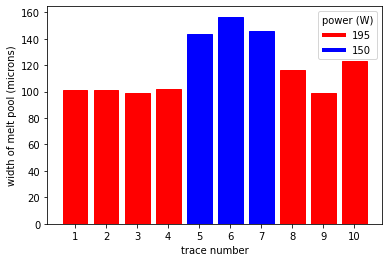

In [24]:
barlist2=plt.bar(dfti['track'],dfti['width'])
for i in dfti.index:
    if dfti['power (W)'][i]==195:
        barlist2[i].set_color('r')
    elif dfti['power (W)'][i]==150:
        barlist2[i].set_color('b')
plt.legend(handles=[Line2D([0],[0],color='r',lw=4),
                Line2D([0],[0],color='b',lw=4)],labels=['195','150'],title='power (W)')
plt.xlabel('trace number')
plt.ylabel('width of melt pool (microns)')
plt.xticks(dfti['track'],dfti['track'])
plt.show()

Scatterplot of width vs depth

<AxesSubplot:xlabel='depth', ylabel='width'>

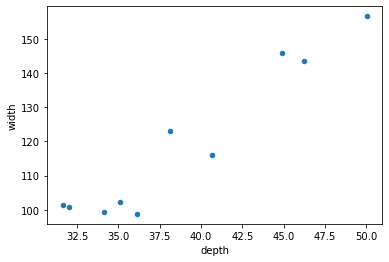

In [25]:
dftd=dft.sort_values(by=['depth'])
dftd.plot(x='depth',y='width',xlabel='depth (microns)',ylabel='width (microns)',kind='scatter') #width vs depth  - pretty good correlation

showing just width data from ambench.nist.gov

<AxesSubplot:xlabel='track number', ylabel='width (microns)'>

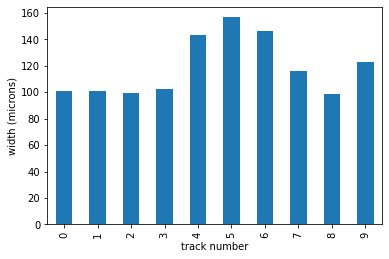

In [27]:
dft.plot(y=['width'],xlabel='track number',ylabel='width (microns)',legend=False,kind='bar') #width vs track # from CDCS images. 0-3 are case 'C', 4-6 are case 'A' and 7-9 are case 'C'

showing just depth data from ambench.nist.gov

<AxesSubplot:xlabel='track number', ylabel='depth (microns)'>

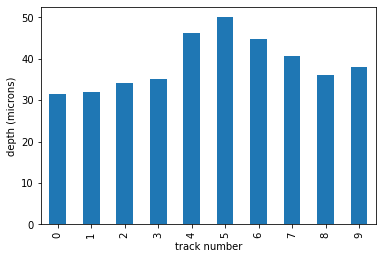

In [28]:
dft.plot(y=['depth'],xlabel='track number',ylabel='depth (microns)',legend=False,kind='bar') # same as above, but plotting depth